# Data Exploration

This notebook can be used to analyse the data which will be used to do the monte carlo simulation. The format of the [data.csv](data.csv) file is:
    
- *id* => the JIRA issue id (only the number part).
- *grp* => the project part from the JIRA issue as number
- *cycle_time_days* => cycle time in days for this JIRA issue (`finish date - start date = cycle time days`). 
 - negative cycle time => ticket was not done. Eg. rejected, won't fix, work as design, etc.
 - zero cycle time => issue was solved in the same day (<24 hours)
- *created_date* => when the issue was created

> **Note** There is some corrupted data with negative cycle times. This data is filtered out.


## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import random
import numpy as np
import pandas as pd

import scipy.stats as stats


## Utility Functions

In [2]:
def read_file(file):
    return  pd.read_csv(file, parse_dates=['created_date'])

def get_cycle_times_for_project(df, id):
    cleaned = df[df['created_date'] > '2017-12-31']
    cleaned = cleaned[cleaned['cycle_time_days'] > -1]

    cycle_times = cleaned[cleaned['grp'] == id].cycle_time_days
    
    return cycle_times.values

def plot_cycle_time_hist(cycle_times, name='Project'):

    fig, ax = plt.subplots(figsize=(10, 5))
    fig.suptitle('Histogram Cycle Times (Days)', fontsize=14, fontweight='bold')
    plt.hist(cycle_times, label=name)
    ax.set_xlabel('Cycle Times')
    ax.set_ylabel('Frequency')
    plt.legend(loc='upper right')
    plt.show()
    
def plot_cycle_times_boxplot(cycle_times, name='Project'):
    fig, ax = plt.subplots(figsize=(10, 5))
    fig.suptitle('Boxplot Cycle Times (Day)', fontsize=14, fontweight='bold')

    plt.boxplot(cycle_times)

    ax.set_xlabel(name)
    ax.set_ylabel('Cycle Times')


    plt.show()
    
def print_summary_stats(cycle_times):
   
    print('Number of observations:', stats.describe(cycle_times).nobs)
    print('Coefficient of variation:', stats.variation(cycle_times))
    
    desc = stats.describe(cycle_times)
    print('nobs', desc.nobs)
    print('minmax', desc.minmax)
    print('mean', desc.mean)
    print('variance', desc.variance)
    print('skewness', desc.skewness)
    print('kurtosis', desc.kurtosis)
    
    

## Analyse the Data for Project 0

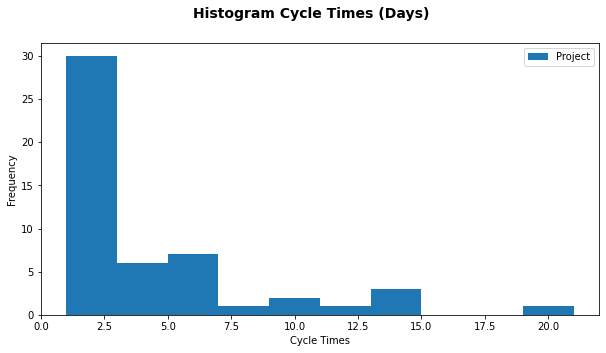

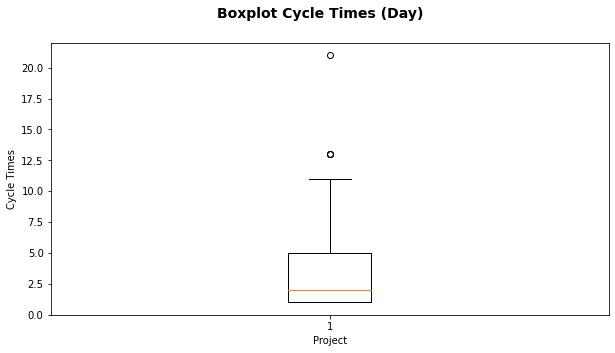

Number of observations: 51
Coefficient of variation: 1.131409450013304
nobs 51
minmax (1, 21)
mean 3.7058823529411766
variance 17.93176470588235
skewness 2.0789642149745884
kurtosis 4.474217402617895


In [3]:
df = read_file('data.csv')
cycle_times = get_cycle_times_for_project(df, 0)
plot_cycle_time_hist(cycle_times)
plot_cycle_times_boxplot(cycle_times)
print_summary_stats(cycle_times)

## Analyse the Data for Project 0

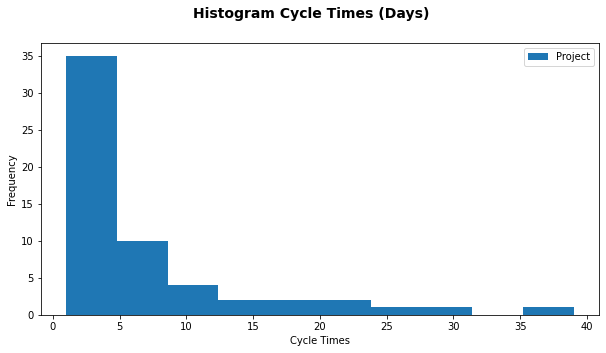

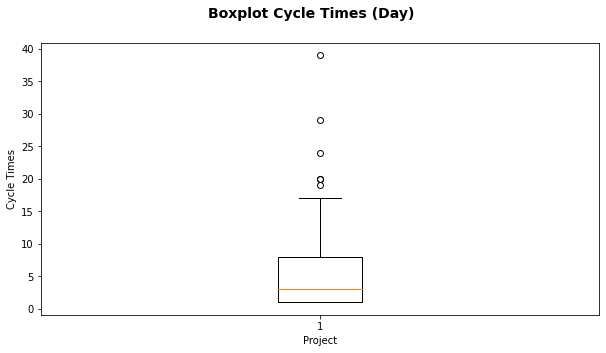

Number of observations: 58
Coefficient of variation: 1.2260520692931383
nobs 58
minmax (1, 39)
mean 6.327586206896552
variance 61.2416817906836
skewness 2.146885333051502
kurtosis 4.8044881900831315


In [4]:
cycle_times = get_cycle_times_for_project(df, 1)
plot_cycle_time_hist(cycle_times)
plot_cycle_times_boxplot(cycle_times)
print_summary_stats(cycle_times)